In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df = df.drop(columns=["Unnamed: 32"])

In [8]:
df.duplicated().sum()


0

In [9]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
data = df['diagnosis'].map({'B': 0, 'M': 1})
data.head(10)


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X = df.drop('diagnosis', axis=1)  
y = df['diagnosis']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print(X_train.shape)  
print(X_test.shape)

(455, 31)
(114, 31)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


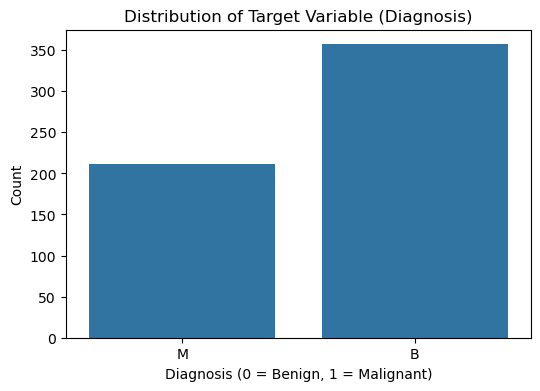

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Target Variable (Diagnosis)')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Accuracy Score:  0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



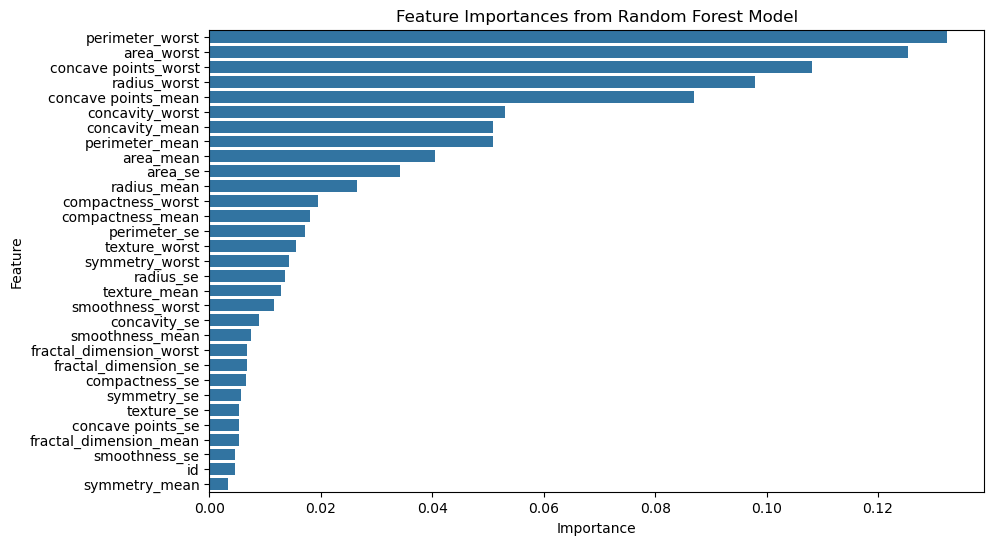

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importances = rf_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances from Random Forest Model")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],            
    'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 4],                  
    'max_features': ['auto', 'sqrt', 'log2'],      
    'bootstrap': [True, False]}

In [20]:
rf_model = RandomForestClassifier(random_state=42)

In [21]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5,                  
                           n_jobs=-1,             
                           verbose=2,             
                           scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-validation Score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
965 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-pack

Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-validation Score: 0.96
Accuracy Score:  0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



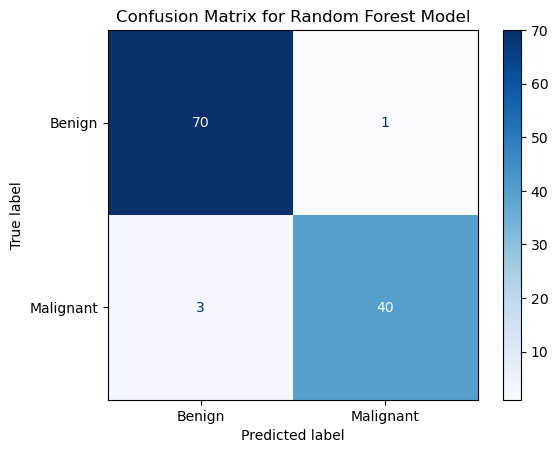

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [23]:

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = grid_search.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n", report)


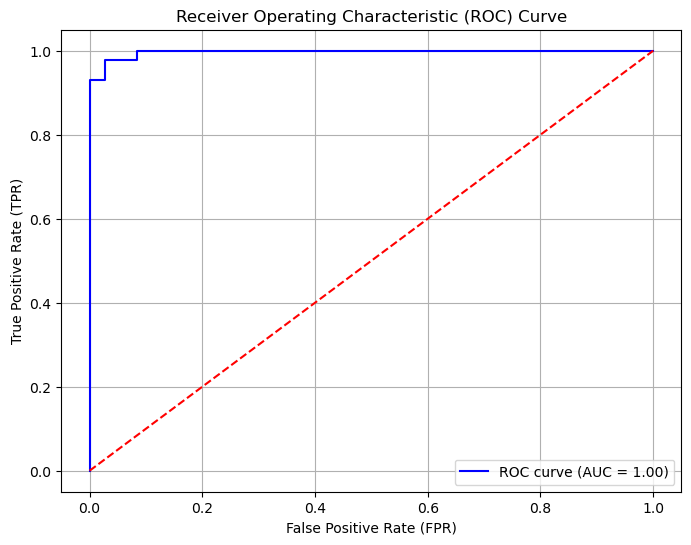

Threshold: inf, FPR: 0.00, TPR: 0.00
Threshold: 1.00, FPR: 0.00, TPR: 0.30
Threshold: 1.00, FPR: 0.00, TPR: 0.35
Threshold: 1.00, FPR: 0.00, TPR: 0.42
Threshold: 0.67, FPR: 0.00, TPR: 0.93
Threshold: 0.36, FPR: 0.03, TPR: 0.93
Threshold: 0.31, FPR: 0.03, TPR: 0.98
Threshold: 0.22, FPR: 0.08, TPR: 0.98
Threshold: 0.19, FPR: 0.08, TPR: 1.00
Threshold: 0.01, FPR: 0.56, TPR: 1.00
Threshold: 0.01, FPR: 0.62, TPR: 1.00
Threshold: 0.01, FPR: 0.66, TPR: 1.00
Threshold: 0.01, FPR: 0.70, TPR: 1.00
Threshold: 0.01, FPR: 0.72, TPR: 1.00
Threshold: 0.00, FPR: 0.77, TPR: 1.00
Threshold: 0.00, FPR: 1.00, TPR: 1.00


In [24]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_binary = y_test.map({'B': 0, 'M': 1})

y_prob = grid_search.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

auc = roc_auc_score(y_test_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

for f, t, threshold in zip(fpr, tpr, thresholds):
    print(f"Threshold: {threshold:.2f}, FPR: {f:.2f}, TPR: {t:.2f}")


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = df.drop('diagnosis', axis=1)  
y = df['diagnosis']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




In [26]:

print(X_train.isnull().sum())  
print(y_train.isnull().sum()) 

print(X_test.isnull().sum())

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  


id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
0
id                         0
radius_mean                0
texture_mean               0

In [27]:
from sklearn.impute import SimpleImputer

if X_train.shape[0] > 0:
    imputer = SimpleImputer(strategy='mean')  
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    print(f"Shape of X_train after imputation: {X_train_imputed.shape}")
    print(f"Shape of X_test after imputation: {X_test_imputed.shape}")
else:
    print("X_train is empty. Please check the data preprocessing steps.")


Shape of X_train after imputation: (455, 31)
Shape of X_test after imputation: (114, 31)


In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

voting_model = VotingClassifier(estimators=[('rf', rf_model), ('ada', ada_model)], voting='hard')

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)

print(classification_report(y_test, y_pred_voting))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


ada_model = AdaBoostClassifier(n_estimators=50)
gnb_model = GaussianNB()


voting_model = VotingClassifier(estimators=[('ada', ada_model), ('gnb', gnb_model)], voting='hard')


voting_model.fit(X_train, y_train)


y_pred_voting = voting_model.predict(X_test)


print(classification_report(y_test, y_pred_voting))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           B       0.62      1.00      0.77        71
           M       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.metrics import classification_report

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


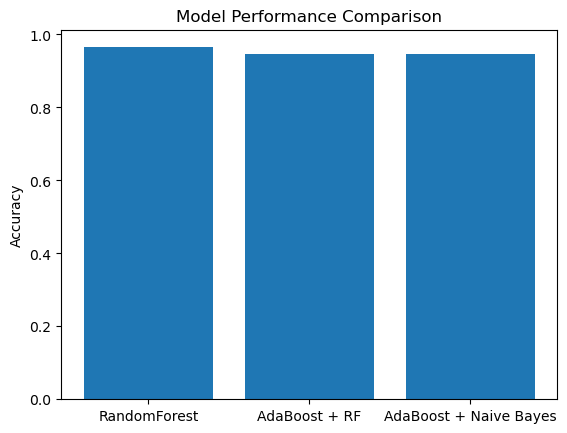

In [40]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_nb_model = AdaBoostClassifier( n_estimators=50,random_state=42)

rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
ada_nb_model.fit(X_train, y_train)

rf_score = rf_model.score(X_test, y_test)
ada_score = ada_model.score(X_test, y_test)
ada_nb_score = ada_nb_model.score(X_test, y_test)

models = ['RandomForest', 'AdaBoost + RF', 'AdaBoost + Naive Bayes']
scores = [rf_score, ada_score, ada_nb_score]
plt.bar(models, scores)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()
